# Analysis
My API would not call.

In [ ]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import random
import requests
import time
import numpy as np
from apikey import mykey

#Data
data_file = "cities.csv"

In [29]:
# Randomly select at least 500 unique cities based on latitude and longitude
cities = []
for i in range(500):
    latitude = random.randint(-9000, 9000)/100
    longitude = random.randint(-18000, 18000)/100
    newCity = citipy.nearest_city(latitude, longitude).city_name
    cities.append(newCity)
    
city_data = []

In [30]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [34]:
# Perform a weather check on each of the cities using a series of successive API calls

url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid="+ mykey

weatherResults = []

    
# print log of each city as it is being processed with the city number and city name  
print("Beginning Data Retrieval     ")
print("-----------------------------")


cityNum = 1
for city in cities:

    #print log of each city as it is being processed with the city number and city name  
    print("Analyzing city name %s , number %d" %(city, cityNum))
    print("\n")



concatCity = ('%20').join(city.split(' '))
newURL = url + "&q=" + concatCity

try:
        weatherInfo = requests.get(newURL)
        weatherData = weatherInfo.json()

        # temp humidity cloudiness windspeed 
        actualLon = weatherData['coord']['lon']
        actualLat = weatherData['coord']['lat']
        currentTemp = weatherData['main']['temp']
        humidity = weatherData['main']['humidity']
        wind = weatherData['wind']['speed']
        cloudiness = weatherData['clouds']['all']
        country = weatherData['sys']['country']
        cityDateTime = weatherData['dt']
        cityNum+=1
        d = {"Longitude": actualLon, "Latitude": actualLat, "Temperature": currentTemp,"Humidity": humidity, "Wind": wind, "Cloudiness": cloudiness, "Country": country, "DateTime": cityDateTime}
        weatherResults.append(d)

# if then
except:
    print("City not found. Skipping...")
    pass
              
# Print data complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Analyzing city name osoyoos , number 1


Analyzing city name san carlos de bariloche , number 1


Analyzing city name bam , number 1


Analyzing city name port elizabeth , number 1


Analyzing city name cape town , number 1


Analyzing city name ushuaia , number 1


Analyzing city name ushuaia , number 1


Analyzing city name kalasin , number 1


Analyzing city name ponerihouen , number 1


Analyzing city name mataura , number 1


Analyzing city name ayan , number 1


Analyzing city name colares , number 1


Analyzing city name souillac , number 1


Analyzing city name kapaa , number 1


Analyzing city name klaksvik , number 1


Analyzing city name kaitangata , number 1


Analyzing city name amderma , number 1


Analyzing city name lompoc , number 1


Analyzing city name kloulklubed , number 1


Analyzing city name mount gambier , number 1


Analyzing city name aklavik , number 1


Analyzing city name arraial do cabo , number 

Analyzing city name rikitea , number 1


Analyzing city name punta arenas , number 1


Analyzing city name mys shmidta , number 1


Analyzing city name princeton , number 1


Analyzing city name celestun , number 1


Analyzing city name korla , number 1


Analyzing city name qaanaaq , number 1


Analyzing city name vaini , number 1


Analyzing city name chokurdakh , number 1


Analyzing city name tasiilaq , number 1


Analyzing city name dunedin , number 1


Analyzing city name bara , number 1


Analyzing city name mataura , number 1


Analyzing city name rikitea , number 1


Analyzing city name bluff , number 1


Analyzing city name ribeira grande , number 1


Analyzing city name uvarovo , number 1


Analyzing city name new norfolk , number 1


Analyzing city name rikitea , number 1


Analyzing city name kamaishi , number 1


Analyzing city name lebu , number 1


Analyzing city name thompson , number 1


Analyzing city name thompson , number 1


Analyzing city name taolanaro , number 

In [36]:
weatherResultsDF = pd.DataFrame(weatherResults)

resultsCSV = "cityWeather.csv"

weatherResultsDF.to_csv(resultsCSV)

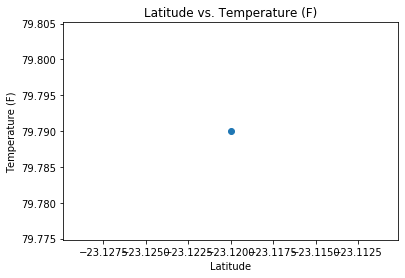

In [37]:
#Temperature (F) vs. Latitude

plt.title("Latitude vs. Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.scatter(weatherResultsDF["Latitude"], weatherResultsDF["Temperature"])
plt.savefig("TempLat.png")
plt.show() 

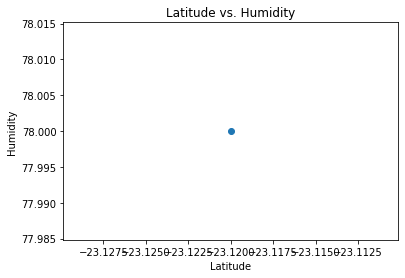

In [38]:
#Humidity (%) vs. Latitude
plt.title("Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(weatherResultsDF["Latitude"], weatherResultsDF["Humidity"])
plt.savefig("HumidityLat.png")
plt.show()

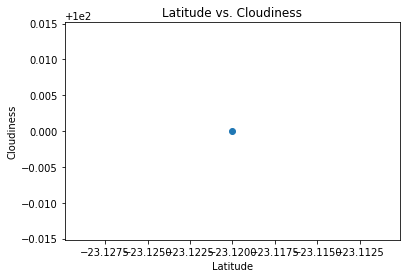

In [39]:
#Cloudiness (%) vs. Latitude
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(weatherResultsDF["Latitude"], weatherResultsDF["Cloudiness"])
plt.savefig("CloudinessLat.png")
plt.show()

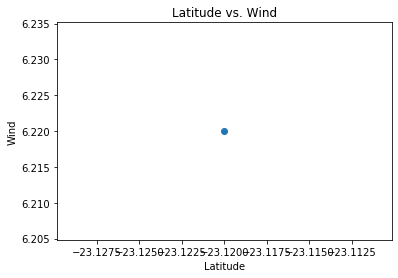

In [40]:
#Wind Speed (mph) vs. Latitude
plt.title("Latitude vs. Wind")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.scatter(weatherResultsDF["Latitude"], weatherResultsDF["Wind"])
plt.savefig("WindLat.png")
plt.show()